In [1]:
import csv
import pandas as pd
import pickle
import os
import datetime
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
ospath = os.path.abspath('C:/Users/Leonard/Downloads/Dataset/F1_All_Traffic.csv')

In [ ]:
data1 = pd.read_csv(ospath)

In [ ]:
data1.columns.values

In [ ]:
data1[data1.columns.values[14:35]].head(30)

In [2]:
def roundTime(dt=None, dateDelta=datetime.timedelta(minutes=1)):
    """Round a datetime object to a multiple of a timedelta
    dt : datetime.datetime object, default now.
    dateDelta : timedelta object, we round to a multiple of this, default 1 minute.
    Author: Thierry Husson 2012 - Use it as you want but don't blame me.
            Stijn Nevens 2014 - Changed to use only datetime objects as variables
    """
    roundTo = dateDelta.total_seconds()

    if dt == None : dt = datetime.datetime.now()
    seconds = (dt - dt.min).seconds
    # // is a floor division, not a comment on following line:
    rounding = (seconds+roundTo/2) // roundTo * roundTo
    return dt + datetime.timedelta(0,rounding-seconds,-dt.microsecond)

In [ ]:
roundTime(datetime.datetime(2016,12,31,23,37,32),datetime.timedelta(minutes=15))

In [ ]:
datetime.datetime.strptime('2016-12-16 02:00:52','%Y-%m-%d %H:%M:%S')

In [ ]:
data1['update_time_datetime'] = data1.apply(lambda x: datetime.datetime.strptime(x['update_time'],'%Y-%m-%d %H:%M:%S'),axis=1)

In [ ]:
data1['update_time15'] = data1.apply(lambda x: roundTime(x['update_time_datetime'],datetime.timedelta(minutes=15)),axis=1)

In [ ]:
list(data1.info_5.unique())[0] is not np.nan

In [ ]:
data1['sent_bytes'] = data1.apply(lambda x: int(x['info_5'].split('; ')[1].split('=')[1]) if x['info_5'] is not np.nan else 0,axis=1)
data1['rcvd_bytes'] = data1.apply(lambda x: int(x['info_5'].split('; ')[2].split('=')[1]) if x['info_5'] is not np.nan else 0,axis=1)

In [ ]:
data1.fillna(0,inplace=True)

In [ ]:
min(data1.update_time15.values)

In [ ]:
data1[(data1.update_time15>=datetime.datetime(2017,1,2,0,0,0)) & (data1.update_time15<datetime.datetime(2017,1,5,0,0,0))].groupby(['update_time15'])['rcvd_bytes','sent_bytes'].sum().apply(lambda x: x/1024/1024/1024).plot(kind='line',figsize=(12,6))

In [ ]:
int('duration=30; sent_bytes=75; rcvd_bytes=234'.split('; ')[2].split('=')[1])

In [4]:
path = os.path.abspath('F:/bda_project_files/dataset')

In [14]:
datadict = {}
for root, _ , files in os.walk(path):
    for file in files:
        print(root,file)
        filep = file[3:]
        if filep[-4:]=='.csv':
            filep = filep.replace('_modified','')
            if filep in datadict: 
                tempdata = pd.read_csv(os.path.join(root,file),parse_dates=['update_time'],infer_datetime_format=True)
                tempdata.dropna(axis=0,how='all',inplace=True)
                datadict[filep] = pd.concat([datadict[filep],tempdata])
            else:
                tempdata = pd.read_csv(os.path.join(root,file),parse_dates=['update_time'],infer_datetime_format=True)
                tempdata.dropna(axis=0,how='all',inplace=True)
                datadict[filep] = tempdata
    

F:\bda_project_files\dataset F1_All_Traffic.csv
F:\bda_project_files\dataset F1_Device_Statistic.csv
F:\bda_project_files\dataset F1_GWC_Statistic.csv
F:\bda_project_files\dataset F2_All_Traffic_modified.csv


C:\Users\Leonard\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


F:\bda_project_files\dataset F2_Device_Statistic_modified.csv
F:\bda_project_files\dataset F2_GWC_Statistic_modified.csv
F:\bda_project_files\dataset F3_All_Traffic_modified.csv


C:\Users\Leonard\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (14,16,25,26,32) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


F:\bda_project_files\dataset F3_Device_Statistic_modified.csv


In [6]:
for k,v in datadict.items():
    print(k,v.columns.values)

Device_Statistic.csv ['Unnamed: 0' 'sid' 'cluster' 'raw_id' 'device' 'unix_time' 'in_octets'
 'out_octets' 'log_type' 'update_time']
GWC_Statistic.csv ['Unnamed: 0' 'sid' 'appliance_id' 'cluster' 'ssid' 'radio' 'band'
 'rcvd_bytes' 'sent_bytes' 'client_count' 'log_type' 'update_time' 'wap']
All_Traffic.csv ['Unnamed: 0' 'sid' 'cluster' 'tag_id' 'raw_id' 'disp' 'direction' 'pri'
 'policy' 'protocol' 'src_ip' 'src_port' 'dst_ip' 'dst_port' 'src_ip_nat'
 'src_port_nat' 'dst_ip_nat' 'dst_port_nat' 'src_intf' 'dst_intf' 'rc'
 'pckt_len' 'ttl' 'pr_info' 'proxy_act' 'alarm_name' 'alarm_type'
 'alarm_id' 'info_1' 'info_2' 'info_3' 'info_4' 'info_5' 'info_6'
 'log_type' 'msg' 'bucket' 'update_time' 'info_7' 'info_8' 'info_9'
 'info_10' 'info_11' 'info_12' 'msg_id']


In [8]:
# datadict['All_Traffic.csv'].dropna(axis=0,how='all',inplace=True)

In [7]:
datadict['All_Traffic.csv'].head()

,Unnamed: 0,sid,cluster,tag_id,raw_id,disp,direction,pri,policy,protocol,...,msg,bucket,update_time,info_7,info_8,info_9,info_10,info_11,info_12,msg_id
0,0,1116303749,NaN,1001,331473,2,0,4,Unhandled-External-Packet-00,34295/udp,...,Denied,NaN,2016-12-16 02:00:10,NaN,NaN,NaN,NaN,NaN,NaN,3000-0148
1,1,1116303750,NaN,1001,331474,2,0,4,Unhandled-External-Packet-00,telnet/tcp,...,Denied,NaN,2016-12-16 02:00:13,NaN,NaN,NaN,NaN,NaN,NaN,3000-0148
2,2,1116303926,NaN,1001,331477,2,0,4,Unhandled-External-Packet-00,telnet/tcp,...,Denied,NaN,2016-12-16 02:00:51,NaN,NaN,NaN,NaN,NaN,NaN,3000-0148
3,3,1116303927,NaN,1001,331478,2,0,4,Unhandled-External-Packet-00,telnet/tcp,...,Denied,NaN,2016-12-16 02:00:52,NaN,NaN,NaN,NaN,NaN,NaN,3000-0148
4,4,1116303928,NaN,1001,331479,2,0,4,Unhandled-External-Packet-00,7547/tcp,...,Denied,NaN,2016-12-16 02:00:52,NaN,NaN,NaN,NaN,NaN,NaN,3000-0148


In [10]:
import sys

In [11]:
for col in datadict['All_Traffic.csv'].columns.values:
    print("{}: {:.0f}MB".format(col,sys.getsizeof( datadict['All_Traffic.csv'][col])/1024/1024))

Unnamed: 0: 89MB
sid: 89MB
cluster: 89MB
tag_id: 89MB
raw_id: 89MB
disp: 89MB
direction: 89MB
pri: 89MB
policy: 462MB
protocol: 407MB
src_ip: 426MB
src_port: 89MB
dst_ip: 432MB
dst_port: 89MB
src_ip_nat: 405MB
src_port_nat: 89MB
dst_ip_nat: 222MB
dst_port_nat: 89MB
src_intf: 434MB
dst_intf: 434MB
rc: 89MB
pckt_len: 89MB
ttl: 89MB
pr_info: 341MB
proxy_act: 89MB
alarm_name: 222MB
alarm_type: 222MB
alarm_id: 89MB
info_1: 89MB
info_2: 89MB
info_3: 89MB
info_4: 89MB
info_5: 364MB
info_6: 89MB
log_type: 372MB
msg: 336MB
bucket: 89MB
update_time: 466MB
info_7: 89MB
info_8: 89MB
info_9: 89MB
info_10: 89MB
info_11: 89MB
info_12: 89MB
msg_id: 411MB


In [15]:
forecast_data = datadict['All_Traffic.csv'][['update_time','info_5']].fillna(0)
print("{:.0f}MB".format(sys.getsizeof( forecast_data)/1024/1024))

408MB


In [28]:
forecast_data['sent_bytes'] = [int(x.split('; ')[1].split('=')[1]) if x!=0 else 0 for x in forecast_data['info_5'].tolist()]
forecast_data['rcvd_bytes'] = [int(x.split('; ')[2].split('=')[1]) if x!=0 else 0 for x in forecast_data['info_5'].tolist()]

In [61]:
# Truncating the dates is very slow for some reason, made this loop to know how long it took

outlist = []
inlist = forecast_data['update_time'].tolist()
length = len(inlist)
for index, x in enumerate(inlist):
    outlist.append(roundTime(x.to_pydatetime(),datetime.timedelta(minutes=15)))
    if index % 1000000 == 0:
        print("{:.0f} rows left".format(length-index))
# [roundTime(x,datetime.timedelta(minutes=15)) for x in forecast_data['update_time'].tolist()]


5821274 rows left
4821274 rows left
3821274 rows left
2821274 rows left
1821274 rows left
821274 rows left


In [62]:
forecast_data['update_time15'] = outlist

In [59]:
# print(inlist[:5],'\n',outlist[:5],roundTime(inlist[0].to_pydatetime(),datetime.timedelta(minutes=15)))

[Timestamp('2016-12-16 02:00:10'), Timestamp('2016-12-16 02:00:13'), Timestamp('2016-12-16 02:00:51'), Timestamp('2016-12-16 02:00:52'), Timestamp('2016-12-16 02:00:52')] 
 [Timestamp('2016-12-16 01:57:44'), Timestamp('2016-12-16 01:57:44'), Timestamp('2016-12-16 01:57:44'), Timestamp('2016-12-16 01:57:44'), Timestamp('2016-12-16 01:57:44')] 2016-12-16 02:00:00


In [ ]:
# updatetime = map(roundTime(),inlist,datetime.timedelta(minutes=15))

In [63]:
forecast_data.head()

,update_time,info_5,sent_bytes,rcvd_bytes,update_time15
0,2016-12-16 02:00:10,0,0,0,2016-12-16 02:00:00
1,2016-12-16 02:00:13,0,0,0,2016-12-16 02:00:00
2,2016-12-16 02:00:51,0,0,0,2016-12-16 02:00:00
3,2016-12-16 02:00:52,0,0,0,2016-12-16 02:00:00
4,2016-12-16 02:00:52,0,0,0,2016-12-16 02:00:00


In [110]:
forecast_data_2 = forecast_data.groupby('update_time15')[['sent_bytes','rcvd_bytes']].sum().reset_index()
forecast_data_2['hour'] = [x.hour for x in forecast_data_2.update_time15]
forecast_data_2['min'] = [x.minute for x in forecast_data_2.update_time15]
forecast_data_2['dow'] = [x.weekday() for x in forecast_data_2.update_time15]
forecast_data_2['day'] = [x.day for x in forecast_data_2.update_time15]
forecast_data_2['month'] = [x.month for x in forecast_data_2.update_time15]
forecast_data_2['traffic'] = (forecast_data_2.sent_bytes+forecast_data_2.rcvd_bytes)/1024/1024

In [111]:
forecast_data_2

,update_time15,sent_bytes,rcvd_bytes,hour,min,dow,day,month,traffic
0,2016-12-16 02:00:00,10312,26532,2,0,4,16,12,0.035137
1,2016-12-16 02:15:00,9776,26516,2,15,4,16,12,0.034611
2,2016-12-16 02:30:00,144026,146568,2,30,4,16,12,0.277132
3,2016-12-16 02:45:00,12338,56552,2,45,4,16,12,0.065699
4,2016-12-16 03:00:00,332556,18511495,3,0,4,16,12,17.971087
5,2016-12-16 03:15:00,268161,12195421,3,15,4,16,12,11.886198
6,2016-12-16 03:30:00,2609,8440,3,30,4,16,12,0.010537
7,2016-12-16 03:45:00,1725,4205,3,45,4,16,12,0.005655
8,2016-12-16 04:00:00,14523,18267,4,0,4,16,12,0.031271
9,2016-12-16 04:15:00,113790,55959,4,15,4,16,12,0.161885


In [132]:
f = open('forecastdata.p','wb')
pickle.dump(forecast_data_2,f)
f.close()

In [6]:
forecast_data_2 = pickle.load(open('forecastdata.p','rb'))

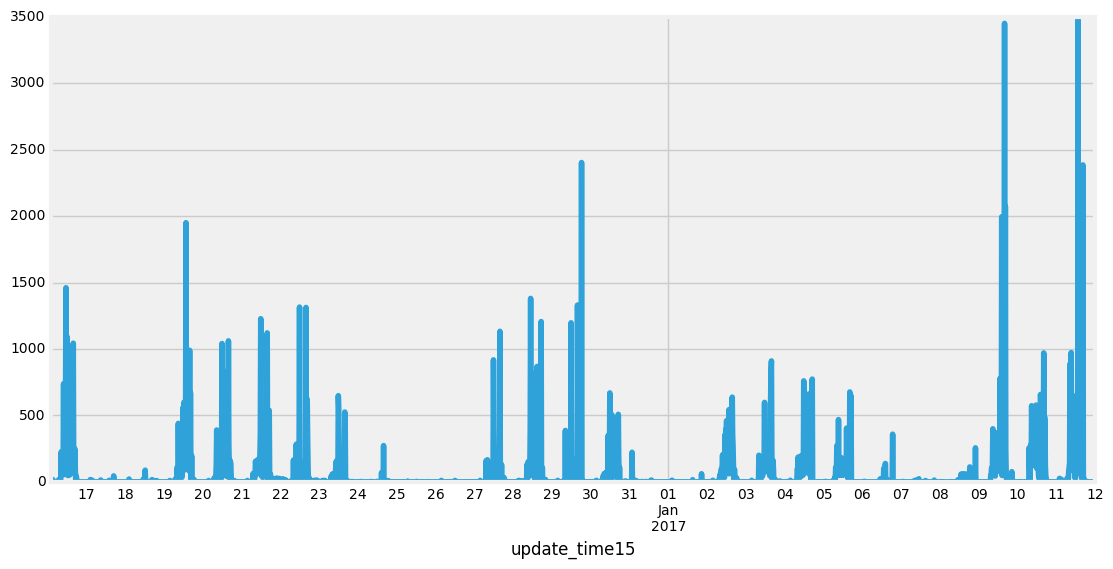

In [7]:
forecast_data_2.set_index('update_time15')['traffic'].plot(kind='line',figsize=(12,6))

In [8]:
forecast_data_2.drop(['day','month'],axis=1,inplace=True)

In [163]:
forecast_data_2.tail()

,update_time15,sent_bytes,rcvd_bytes,hour,min,dow,traffic,seasdiff
2580,2017-01-11 23:00:00,32421,10918,23,0,2,0.041331,-480.656167
2581,2017-01-11 23:15:00,43273,15096,23,15,2,0.055665,-300.469033
2582,2017-01-11 23:30:00,46403,80250,23,30,2,0.120786,-48.973396
2583,2017-01-11 23:45:00,32607,10760,23,45,2,0.041358,-23.705918
2584,2017-01-12 00:00:00,14348,2050,0,0,3,0.015638,-61.502665


In [153]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput )

C:\Users\Leonard\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).mean()
C:\Users\Leonard\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=12).std()


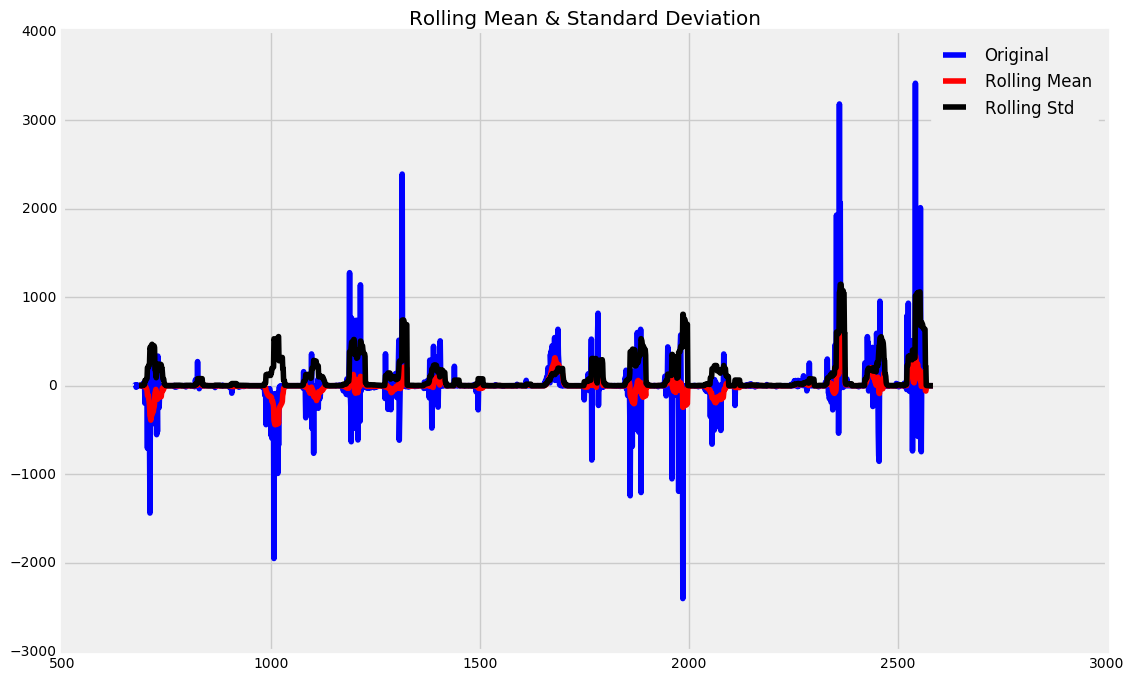

Results of Dickey-Fuller Test:
Test Statistic                -7.491510e+00
p-value                        4.492738e-11
#Lags Used                     1.500000e+01
Number of Observations Used    1.897000e+03
Critical Value (1%)           -3.433802e+00
Critical Value (10%)          -2.567582e+00
Critical Value (5%)           -2.863065e+00
dtype: float64


In [164]:
forecast_data_2['seasdiff'] = forecast_data_2.traffic-forecast_data_2.traffic.shift(24*4*7)
test_stationarity(forecast_data_2.seasdiff.dropna(inplace=False))

In [91]:
cutoffdate = datetime.datetime(2017,1,6,0,0,0)

In [142]:
traindata = forecast_data_2[forecast_data_2.update_time15<=cutoffdate]
testdata = forecast_data_2[forecast_data_2.update_time15>cutoffdate]

In [143]:
X_train = np.array(traindata[traindata.columns.values[3:-1]])
X_test = np.array(testdata[traindata.columns.values[3:-1]])
y_train = np.array(traindata[traindata.columns.values[-1]])
y_test = np.array(testdata[traindata.columns.values[-1]])

In [94]:
print(X_train.shape,y_train.shape ,X_test.shape,y_test.shape)

(2009, 3) (2009,) (576, 3) (576,)


In [35]:
# y_test.T

In [25]:
import tpot
from tpot import TPOTRegressor

In [26]:
def MAP_error(y_true, y_pred):
    return float(sum(np.abs((y_pred - y_true)/y_true))) / len(y_true)

In [45]:
regr = TPOTRegressor(generations=10,population_size=50,verbosity=2,num_cv_folds=5,scoring='mean_squared_error')
regr.fit(X_train2,y_train)

Version 0.6.7 of tpot is outdated. Version 0.6.8 was released Thursday January 05, 2017.


Generation 1 - Current best internal CV score: 20762.1825152655


Generation 2 - Current best internal CV score: 20708.096496553484


Generation 3 - Current best internal CV score: 20306.806198491715


Generation 4 - Current best internal CV score: 20306.806198491715


Generation 5 - Current best internal CV score: 20306.806198491715


Optimization Progress:  51%|█████▌     | 281/550 [17:56<26:34,  5.93s/pipeline]


GP closed prematurely - will use current best pipeline



Best pipeline: RandomForestRegressor(FastICA(input_matrix, 0.040000000000000001))


In [44]:
regr.export('goodtpotmodel.py')


In [ ]:
Best pipeline: GradientBoostingRegressor(KNeighborsRegressor(GradientBoostingRegressor(ExtraTreesRegressor(input_matrix, 0.70000000000000007), 0.10000000000000001, 0.0001), 28, 35), 23.0, 14.0)
Best pipeline: ExtraTreesRegressor(VarianceThreshold(ElasticNet(input_matrix, 42.0, 0.83999999999999997), 26.0), 0.69000000000000006)

In [139]:
import numpy as np

from sklearn.ensemble import ExtraTreesRegressor, VotingClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import FunctionTransformer

regr =  make_pipeline(
    make_union(VotingClassifier([("est", ElasticNet(alpha=1.0, l1_ratio=0.84))]), FunctionTransformer(lambda X: X)),
    VarianceThreshold(threshold=26.0),
    ExtraTreesRegressor(max_features=0.6900000000000001, n_estimators=500)
)
regr.fit(X_train,y_train)

Pipeline(steps=[('featureunion', FeatureUnion(n_jobs=1,
       transformer_list=[('votingclassifier', VotingClassifier(estimators=[('est', ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.84,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, sel...timators=500, n_jobs=1, oob_score=False, random_state=None,
          verbose=0, warm_start=False))])

In [48]:
print(regr.predict(pcatest.transform(X_test)),y_test)

[  5.71717671e-01   3.25141861e-01   1.45179738e-01   2.51994569e-01
   9.30381355e-01   1.70622590e+01   1.19188332e+00   7.63833023e-01
   3.02069201e+00   1.14719529e+00   4.55439864e-01   1.89279991e+00
   1.88362207e+00   7.48085634e+00   1.05777714e-01   1.44435637e-01
   2.46144084e-01   8.38296466e-02   4.66675120e-01   3.21261934e-01
   2.39033011e-01   2.08671519e-01   4.61835697e-01   9.08793101e-01
   4.67538640e-01   1.04867664e+00   4.63294557e+00   9.40316609e+00
   1.19510463e+01   1.11829942e+01   1.41440084e+01   5.27659017e+01
   7.20289443e+01   5.14719948e+01   4.80087231e+01   3.97871081e+01
   6.24059836e+01   6.23374484e+01   9.58649418e+01   6.65924758e+01
   6.12392931e+01   8.73328538e+01   1.44186797e+02   1.06036700e+02
   1.40447838e+02   1.05958679e+02   4.88035094e+02   1.55400422e+02
   9.48450884e+01   6.03555814e+01   7.39001846e+01   9.74910929e+01
   1.22766689e+02   1.64265645e+02   7.34180222e+01   7.25796525e+01
   8.23510917e+01   8.03530774e+01

In [29]:
sum(np.abs(regr.predict(X_test)-y_test)/y_test)/len(y_test)

203.00258277282876

In [95]:
# from sklearn.svm import SVR
# from sklearn.model_selection import GridSearchCV
# regr = SVR()
# param_grid = [
#   {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
#   {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
#  ]
# grid = GridSearchCV(regr,param_grid=param_grid)
# grid.fit(X_train,y_train)
# # regr.fit(X_train,y_train)

In [42]:
from sklearn.decomposition import PCA
pcatest = PCA(n_components=1)
pcatest.fit(X_train)
print(pcatest.explained_variance_ratio_)
X_train2 = pcatest.transform(X_train)

[ 0.84483565]


best error and pdq: 78547.63452350181, (0, 0, 0)
0 0 0
0 0 1
0 0 2
0 0 3
0 0 4
0 0 5
0 0 6
0 0 0
0 0 1
0 0 2
0 0 0
0 0 1
best error and pdq: 77205.79593136684, (1, 0, 0)
1 0 0
1 0 1
1 0 2
1 0 3
1 0 4
1 0 5
1 0 6
1 0 0
1 0 1
1 0 2
1 0 3
1 0 4
1 0 5
1 0 6
1 0 0
best error and pdq: 72057.74653338364, (2, 0, 0)
2 0 0
2 0 1
2 0 2
2 0 3
2 0 4
2 0 5


C:\Users\Leonard\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 0 6
2 0 0
2 0 1
2 0 2
2 0 3
2 0 4
2 0 5
2 0 6
2 0 0
3 0 0
3 0 1
3 0 2


C:\Users\Leonard\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3 0 3


C:\Users\Leonard\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3 0 4


C:\Users\Leonard\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3 0 5


C:\Users\Leonard\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3 0 6
3 0 0
3 0 1
3 0 2
3 0 3


C:\Users\Leonard\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3 0 4
3 0 5


C:\Users\Leonard\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3 0 6
3 0 0
4 0 0
4 0 1
4 0 2


C:\Users\Leonard\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4 0 3


C:\Users\Leonard\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4 0 4


C:\Users\Leonard\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4 0 5


C:\Users\Leonard\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4 0 6
4 0 0
4 0 1
4 0 2
4 0 3


C:\Users\Leonard\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4 0 4
4 0 5


C:\Users\Leonard\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4 0 6
4 0 0
4 0 1
5 0 0
5 0 1
5 0 2


C:\Users\Leonard\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


5 0 3


C:\Users\Leonard\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


5 0 4


C:\Users\Leonard\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


5 0 5


C:\Users\Leonard\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


5 0 6
5 0 0
5 0 1
5 0 2
5 0 3


C:\Users\Leonard\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


5 0 4


C:\Users\Leonard\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


5 0 5


C:\Users\Leonard\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


5 0 6
5 0 0
5 0 1
6 0 0
6 0 1
6 0 2


C:\Users\Leonard\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


6 0 3


C:\Users\Leonard\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


6 0 4


C:\Users\Leonard\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


6 0 5


C:\Users\Leonard\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


6 0 6
6 0 0
6 0 1
6 0 2
6 0 3


C:\Users\Leonard\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


6 0 4


C:\Users\Leonard\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


6 0 5


C:\Users\Leonard\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


6 0 6
6 0 0
6 0 1


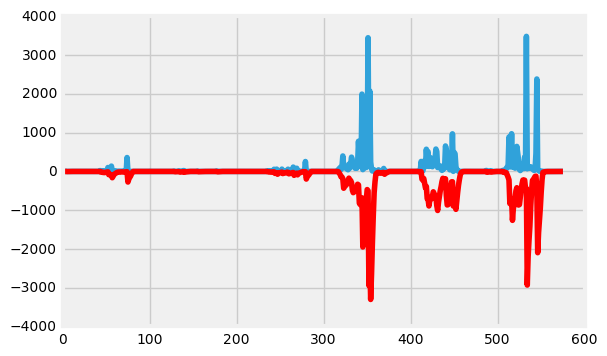

In [31]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima_model import ARIMA, ARMA
from sklearn.metrics import mean_squared_error
#series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
# split dataset
#X = series.values
#train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
error = np.inf
for p in [0,1,2,3,4,5,6]:
    for d in [0,1,2,3]:
        for q in [0,1,2,3,4,5,6]:
            try:
                model = ARIMA(y_train,order=(p,d,q))
                model_fit = model.fit()
                window = model_fit.k_ar
                coef = model_fit.params
                # walk forward over time steps in test
                history = y_train[len(y_train)-window:]
                history = [history[i] for i in range(len(history))]
                predictions = list()
                for t in range(len(y_test)):
                    length = len(history)
                    lag = [history[i] for i in range(length-window,length)]
                    yhat = coef[0]
                    for ds in range(window):
                        yhat += coef[ds+1] * lag[window-ds-1]
                    obs = y_test[t]
                    predictions.append(yhat)
                    history.append(obs)
                #     print('predicted=%f, expected=%f' % (yhat, obs))
                if mean_squared_error(y_test, predictions)<error:
                    error=mean_squared_error(y_test, predictions)
                    print('best error and pdq: {}, {}'.format(error,(p,d,q)))
#                 error = mean_squared_error(y_test, predictions)
                print(p,i,q)
#                 print('Test MSE: %.3f' % error)
            except:
                pass
# plot
pyplot.plot(y_test)
pyplot.plot(predictions, color='red')
pyplot.show()

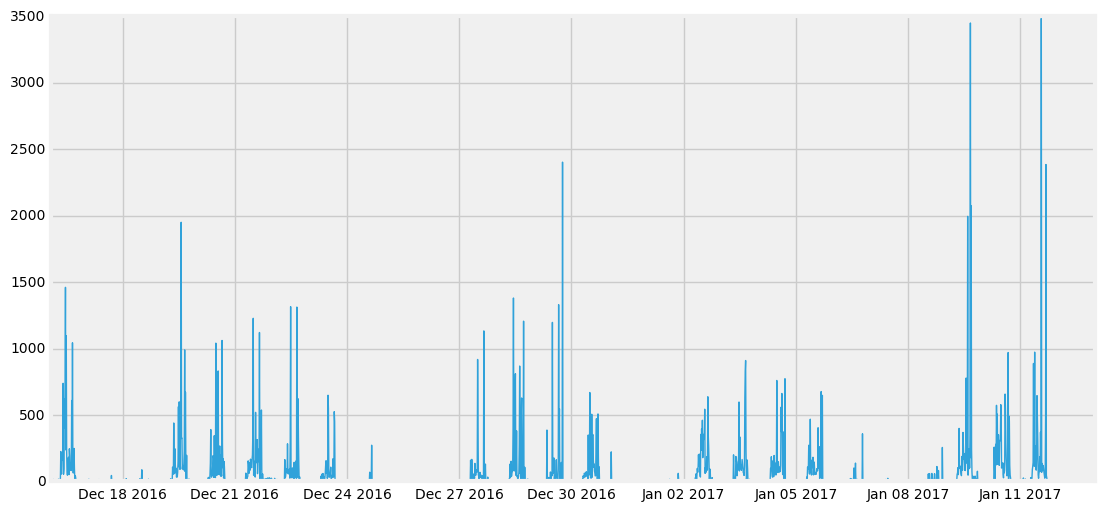

In [125]:


    # walk forward over time steps in test
def tspredict(y_train, future_steps = 4*24*7, order=(2,1,0)):
    model = ARIMA(y_train,order=order)
    model_fit = model.fit()
    window = model_fit.k_ar
    coef = model_fit.params
    history = y_train[len(y_train)-window:]
    history = [history[i] for i in range(len(history))]
    predictions = list()
    for t in range(future_steps):
        length = len(history)
        lag = [history[i] for i in range(length-window,length)]
        yhat = coef[0]
        for d in range(window):
            yhat += coef[d+1] * lag[window-d-1]
#         obs = y_test[t]
        predictions.append(yhat)
        history.append(yhat)
    #     print('predicted=%f, expected=%f' % (yhat, obs))
#     error = mean_squared_error(y_test, np.array(predictions)*-1)
    #     print(p,i,q)
#     print('Test MSE: %.3f' % error)
    return np.abs(np.array(predictions))

y_all = np.concatenate((y_train,y_test))
y_predicted = tspredict(y_train)
x_predicted = [max(np.array(traindata.update_time15))+np.timedelta64(15*(x+1),'m') for x in range(len(y_predicted))]
fig, ax = plt.subplots(figsize=(12,6),sharey=True)
ax.plot(np.array(forecast_data_2.update_time15),y_all,linewidth=1.0)
ax.plot(x_predicted,y_predicted, 'r--',linewidth=1.0)
# plt.xticks(np.array(forecast_data_2.update_time15))
plt.show()

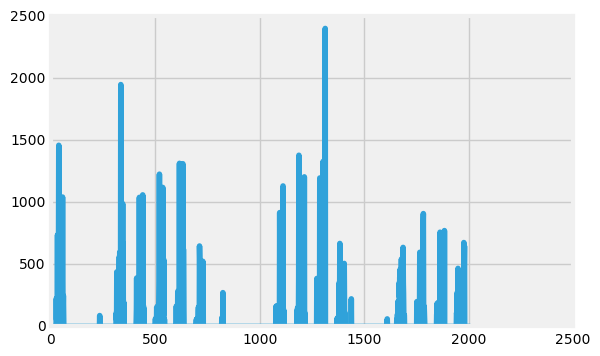

In [151]:
plt.plot(np.where(y_train>50,y_train,0))

In [112]:
max(np.array(forecast_data_2.update_time15))+np.timedelta64(75,'m')

numpy.datetime64('2017-01-12T01:15:00.000000000')

In [61]:
np.set_printoptions(suppress=True)

print(y_test,np.array(predictions)*-1)

[    0.03923225     0.02684593     0.01814747     0.02474403     4.18881321
     0.04490662     0.02220154     0.07006741     0.03401852     0.01624775
     0.0184536      0.02608299     0.03764534     0.01695633     0.01684761
     0.03321171     0.08695602     0.01648808     0.04042149     0.02949047
     0.04646206     0.01678181     0.13922024     0.04243946     0.01737785
     0.02294827     0.02311611     0.03124619     0.05269718     0.03207493
     0.06145        0.04961777     0.01653004     0.05382442     0.71898556
     1.01450825     0.35381794     0.01633167     0.08823586     0.04613304
     0.37082386     0.05994797     0.31670475    21.97465801     2.11741638
    18.97175503     9.52209759    16.13324165     3.36708641     3.0321207
     3.36139679     3.45445633   101.26638031    10.40721607    57.21621132
    19.49297905   138.00430775     9.26325417     1.08330441     1.38019276
    15.92958546    14.09160709     3.43921566     4.3368187      4.44775581
     9.834622

In [30]:
coef

array([  9.47355524e-06,  -6.16831960e-01,  -2.78523475e-01])

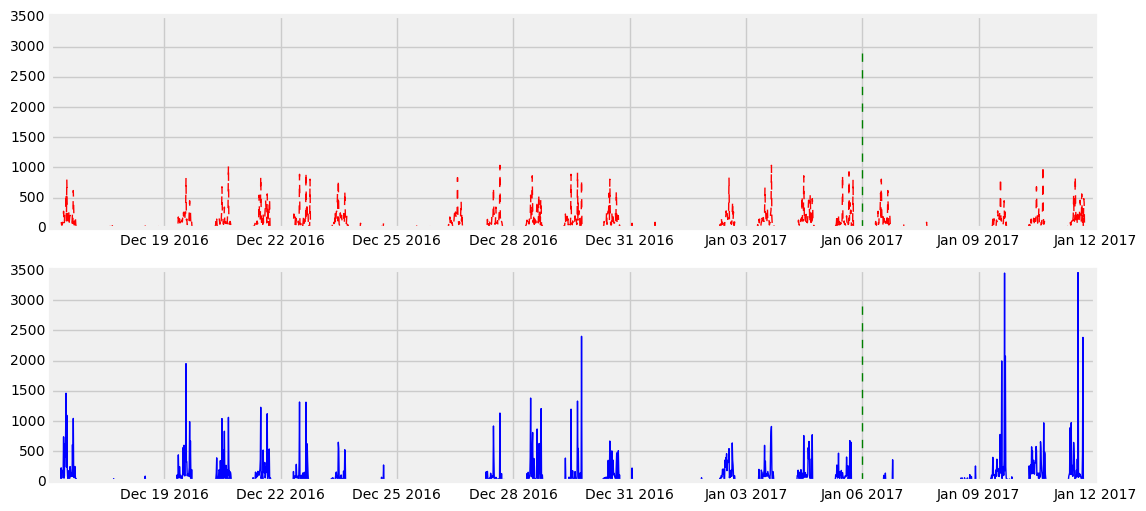

In [169]:
X_all = np.concatenate((X_train,X_test))
# ytsall = np.concatenate((y_train,tspredict(y_train,y_test)))
y_all = np.concatenate((y_train,y_test))

fig, ax = plt.subplots(nrows=2,figsize=(12,6),sharey=True)
ax[0].plot(np.array(forecast_data_2.update_time15),regr.predict(X_all),'r--',linewidth=1)
ax[1].plot(np.array(forecast_data_2.update_time15),y_all,'b',linewidth=1)
ax[0].plot((cutoffdate,cutoffdate),(0,3000),'g--',linewidth=1)
ax[1].plot((cutoffdate,cutoffdate),(0,3000),'g--',linewidth=1)
plt.show()



In [170]:
traindata.groupby(['dow','hour','min'])['traffic'].sum().to_frame().reset_index()
# traindata.day.unique()

,dow,hour,min,traffic
0,0,0,0,0.246682
1,0,0,15,1.250861
2,0,0,30,0.223000
3,0,0,45,0.299556
4,0,1,0,0.310424
5,0,1,15,1.703700
6,0,1,30,0.470332
7,0,1,45,0.386660
8,0,2,0,0.440797
9,0,2,15,1.069631


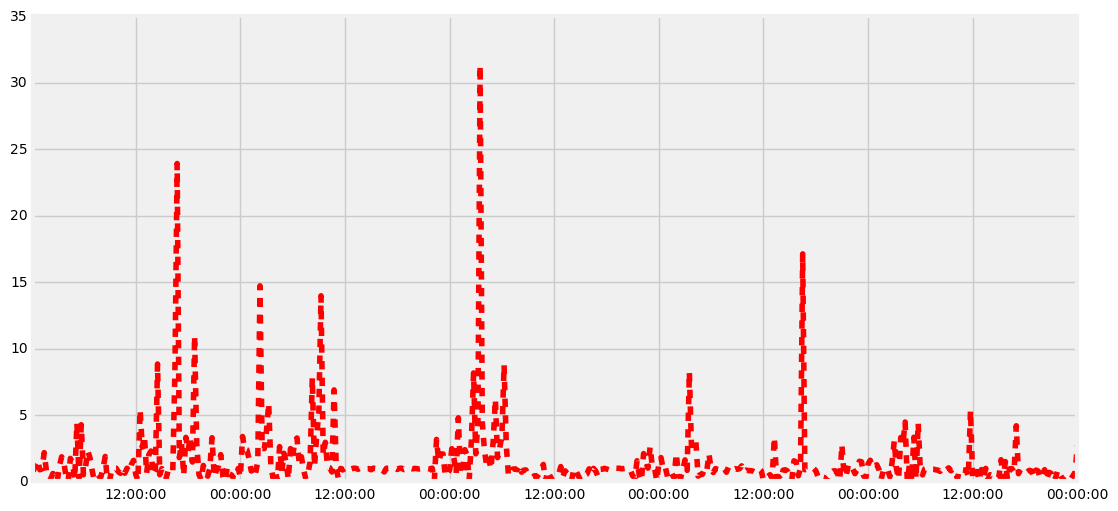

In [19]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(np.array(testdata.update_time15),np.abs((regr.predict(X_test)-y_test)/y_test),'r--')
plt.show()

In [96]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor


In [93]:
reg = Pipeline()
reg = RandomForestRegressor()
reg.fit(X_train,y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [95]:
reg.score(X_test,y_test)

0.05140209343095814

In [13]:
# forecast_data['update_time_datetime'] = forecast_data.apply(lambda x: datetime.datetime.strptime(x['update_time'],'%Y-%m-%d %H:%M:%S'),axis=1)

KeyboardInterrupt: 

In [47]:
def ceil_dt(dt, delta):
    return dt + (datetime.datetime.min - dt) % delta
print((datetime.datetime.min-datetime.datetime.now()) % datetime.timedelta(minutes=15))
ceil_dt(datetime.datetime.now(),datetime.timedelta(minutes=15))

0:10:10.808236


datetime.datetime(2017, 1, 28, 15, 45)

In [ ]:
forecast_data.groupby(['update_time15'])['rcvd_bytes','sent_bytes'].sum().apply(lambda x: x/1024/1024/1024).plot(kind='line',figsize=(12,6))